In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slope     302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
ca        302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal      302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
target    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

<AxesSubplot: xlabel='target', ylabel='count'>

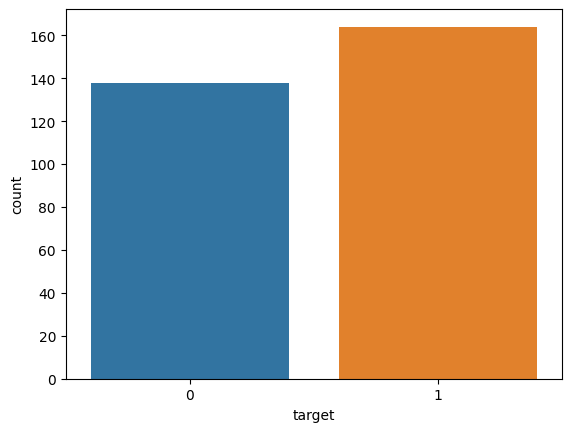

In [11]:
# Balancing Label
sns.countplot(data=df,x='target')

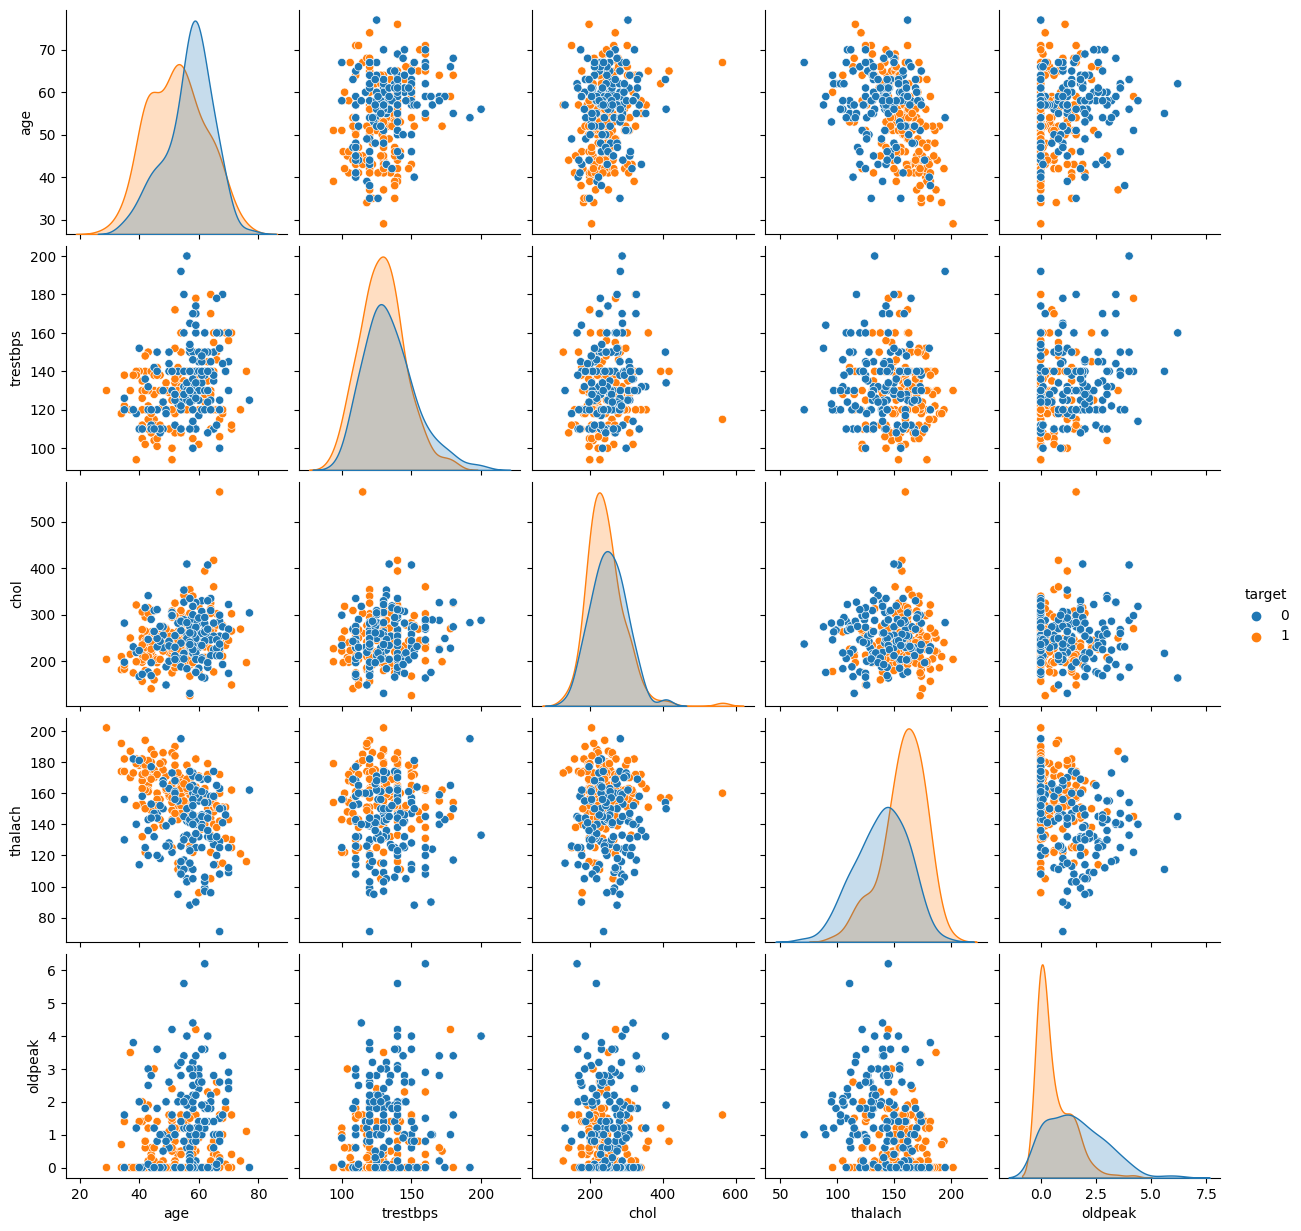

In [12]:
sns.pairplot(data=df,x_vars=['age','trestbps','chol','thalach','oldpeak']
             ,y_vars=['age','trestbps','chol','thalach','oldpeak'],hue='target')

In [13]:
corr_df = df.corr()

In [14]:
target_col = corr_df['target'].drop(index='target')
target_col = target_col.sort_values()
target_col

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
Name: target, dtype: float64

In [15]:
target_corr = pd.DataFrame(data=target_col.values,index=target_col.index,columns=['Importance'])

In [16]:
target_corr

Importance
exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080

<AxesSubplot: ylabel='Importance'>

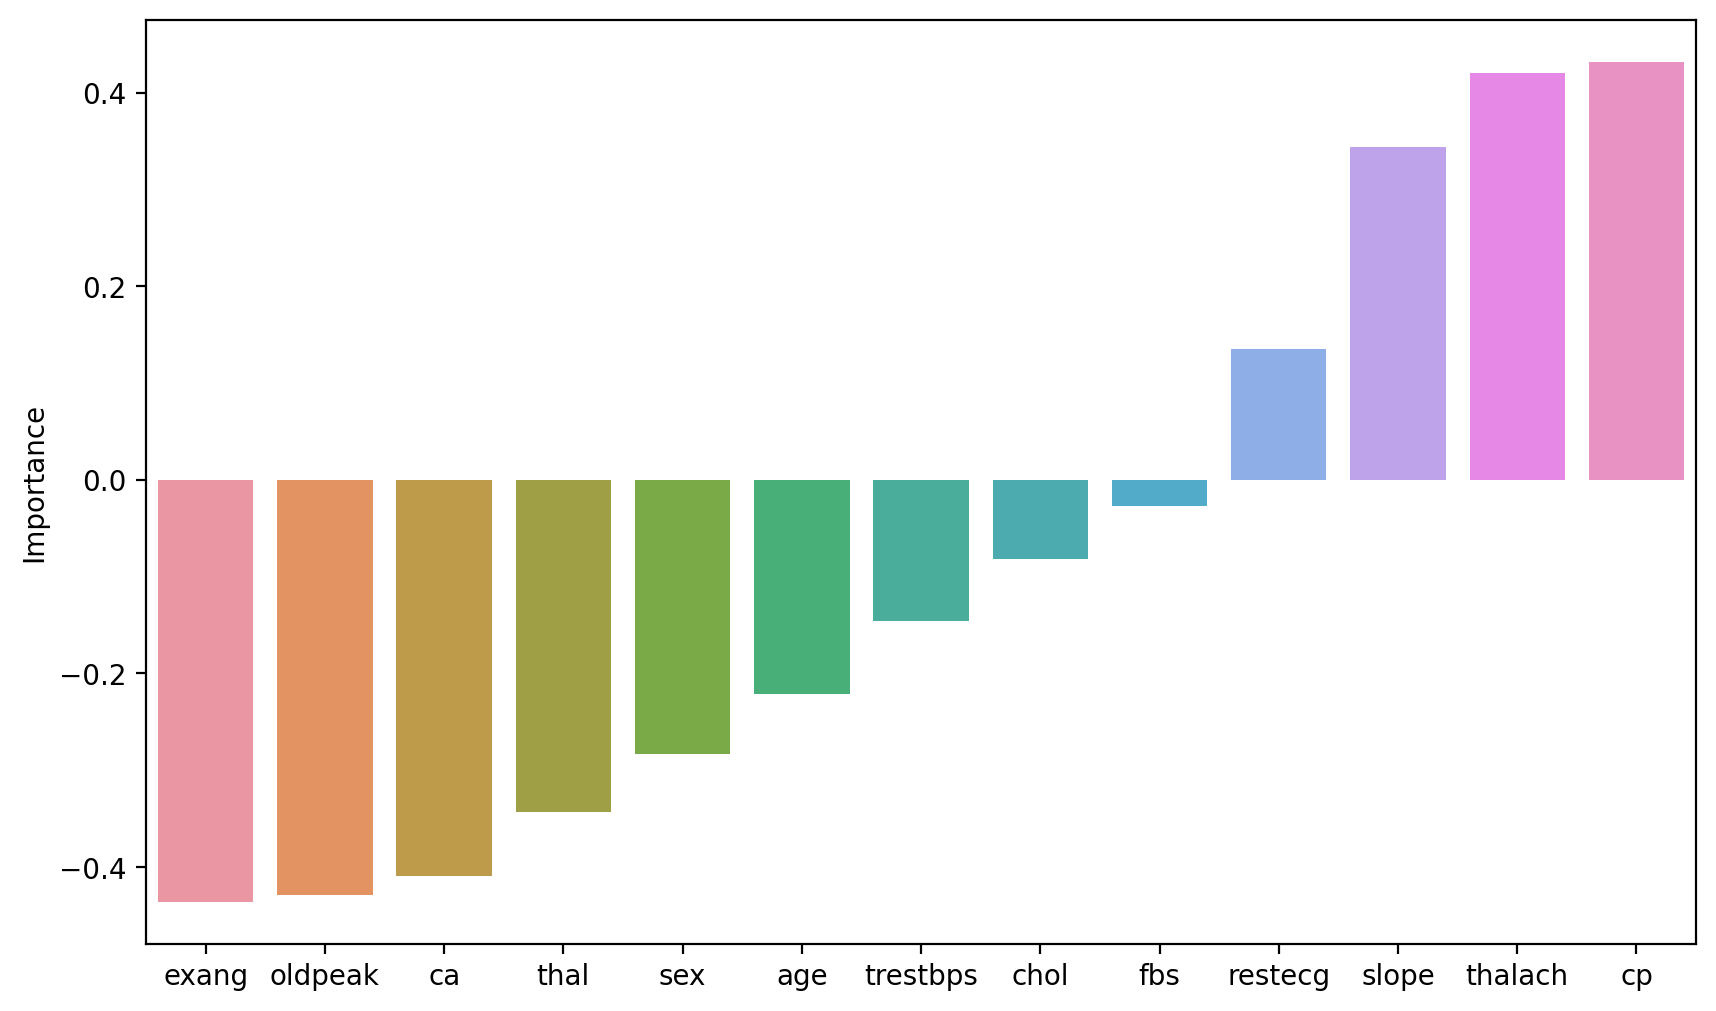

In [17]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=target_corr,x=target_corr.index,y='Importance')

<AxesSubplot: >

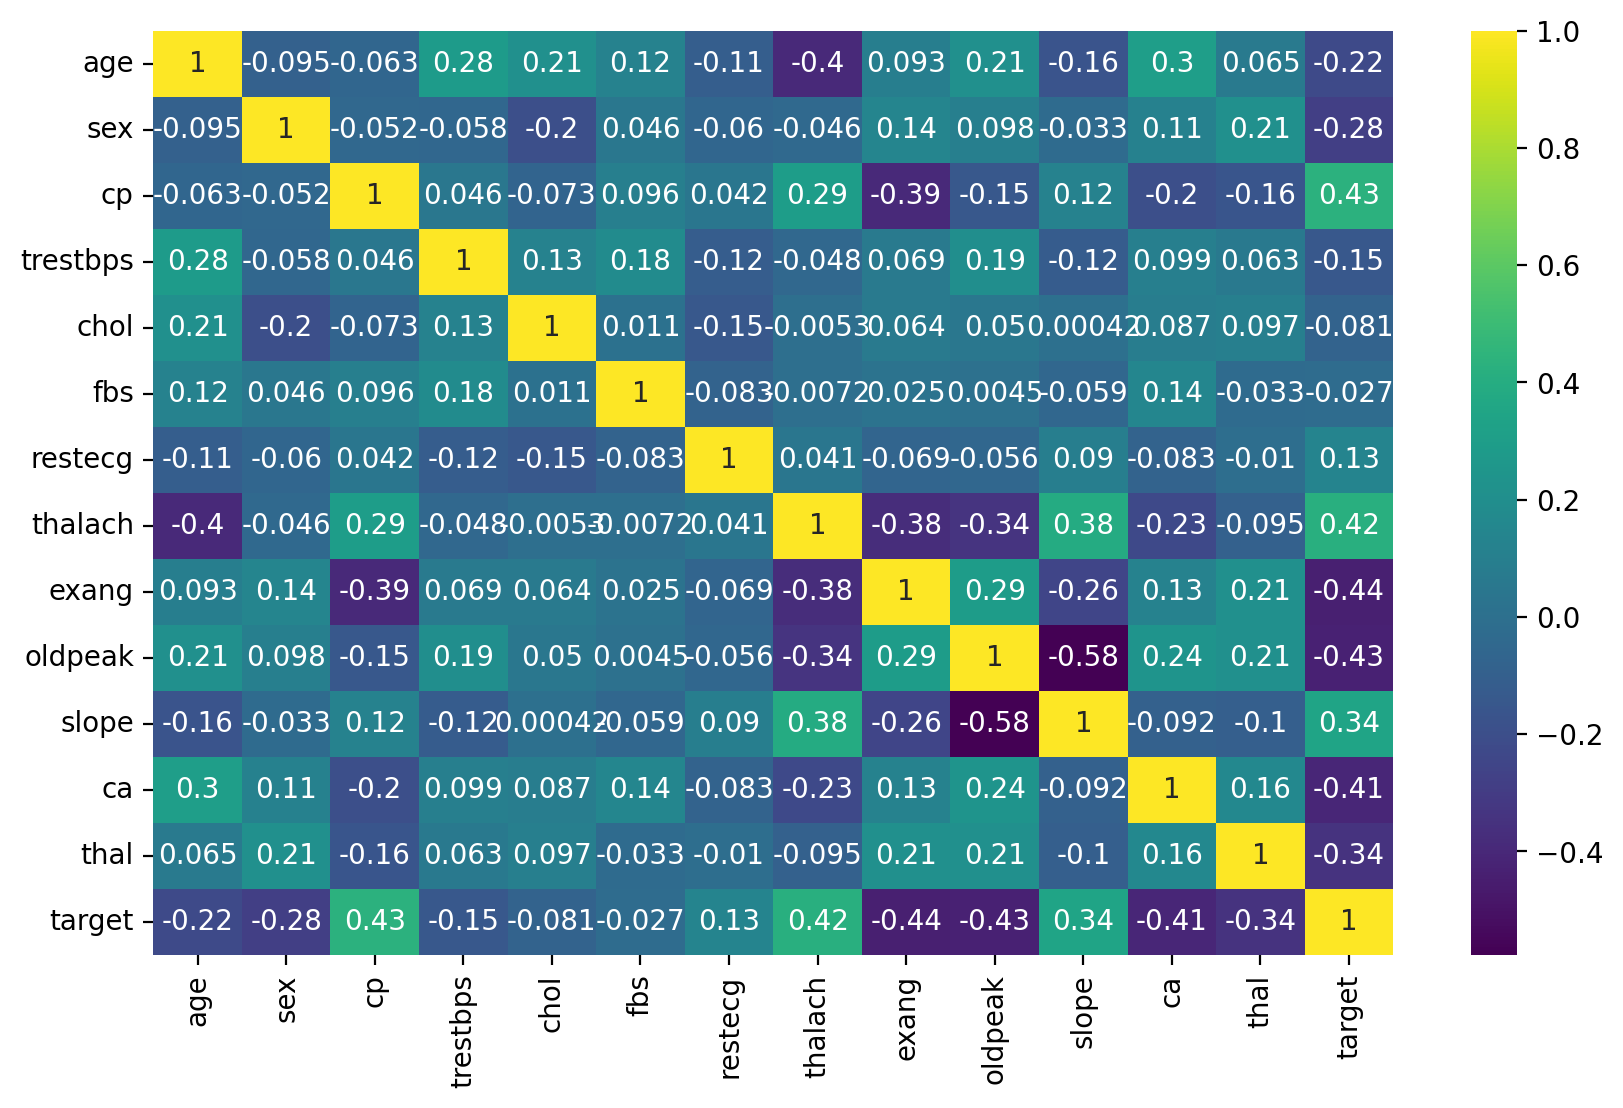

In [18]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## Model

In [19]:
X = df.drop(columns='target')

In [20]:
y = df['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
base_model = SVC()

In [31]:
param_grid = {'C':[0.01,0.1,0.5,1],'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],
             'degree':['None',1,2,3]}

In [32]:
grid_model = GridSearchCV(estimator=base_model,param_grid=param_grid)

In [33]:
grid_model.fit(X_train,y_train)

/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/heart-disease/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/heart-disease/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/heart-disease/venv/lib/python3.9/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solv

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': ['None', 1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [34]:
grid_model.best_params_

{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
test_pred = grid_model.predict(X_test)

In [36]:
y_test.head()

180    0
229    0
111    1
247    0
60     1
Name: target, dtype: int64

In [37]:
test_pred[:5]

array([0, 0, 1, 0, 1])

In [38]:
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score

In [39]:
confusion_matrix(y_test,test_pred)

array([[13,  1],
       [ 2, 15]])

In [40]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.94      0.88      0.91        17

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



## So the overall accuracy of this model = 90%